Importing the Necessary Libraries For Single layer perceptron model , Multiple Layer Perceptron Model and CNN Using Keras

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
from PIL import Image
import cv2

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

from sklearn.linear_model import Perceptron

from sklearn.neural_network import MLPClassifier

import tensorflow as tf

Loading The Image Dataset From Google Drive

In [3]:
data_dir ="/home/mllab2/Desktop/ML/A3/Img"

x=[]
x1=[]
x2=[]

for image in os.listdir(data_dir):
    image_path = os.path.join(data_dir, image)
    img = Image.open(image_path).resize((100, 100))
    img_array = np.array(img)
    img_array1 = np.array(img).flatten() / 255.0
    img_array2 = np.array(img).flatten() / 255.0
    x.append(img_array)
    x1.append(img_array1)
    x2.append(img_array2)

x = np.array(x)
x1 = np.array(x1)
x2 = np.array(x1)

Printing the Sample Images

In [4]:
print("the no of Images in dataset : ",len(x1))

the no of Images in dataset :  3410


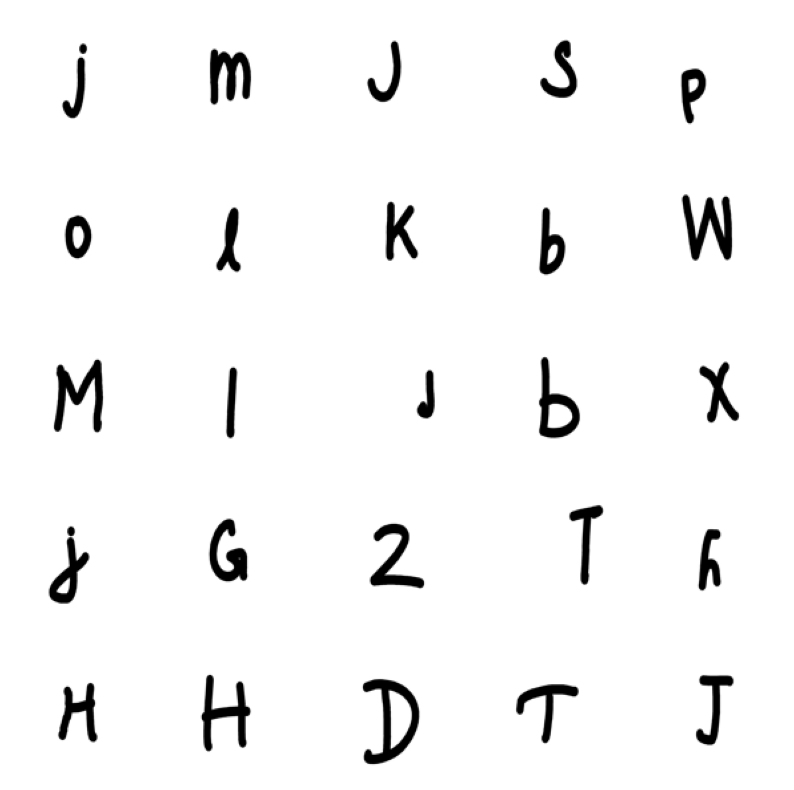

In [5]:
plt.figure(figsize=(10, 10))
for i in range(min(25, len(x))):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x[i], cmap='gray')
    plt.axis('off')
plt.show()

Histogram For The Images

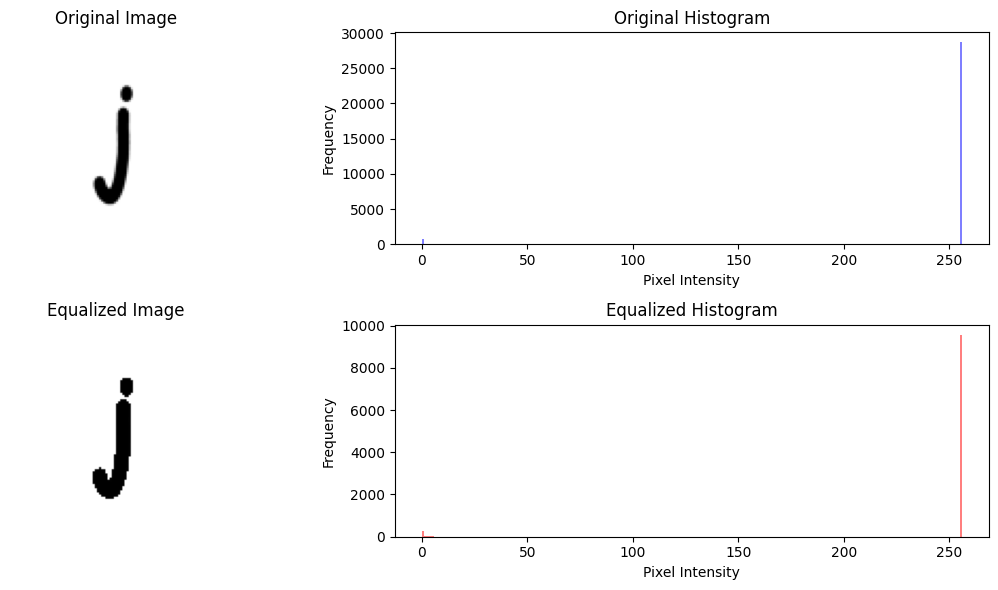

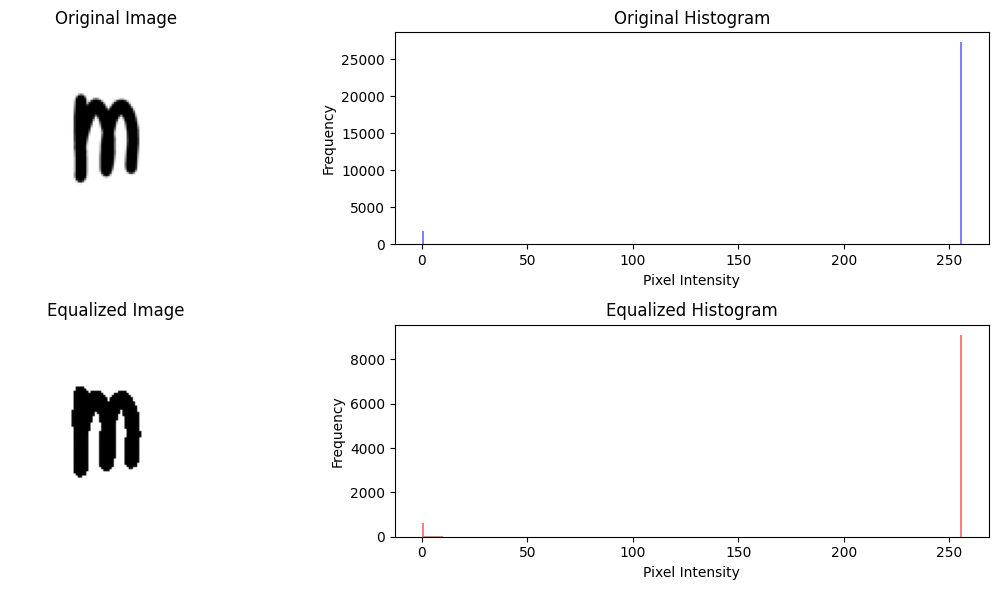

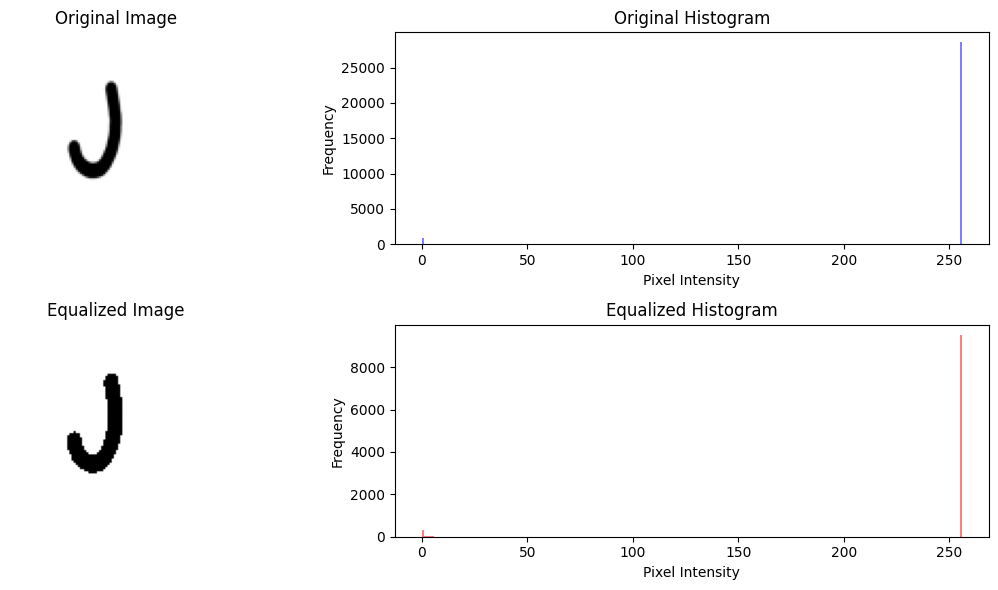

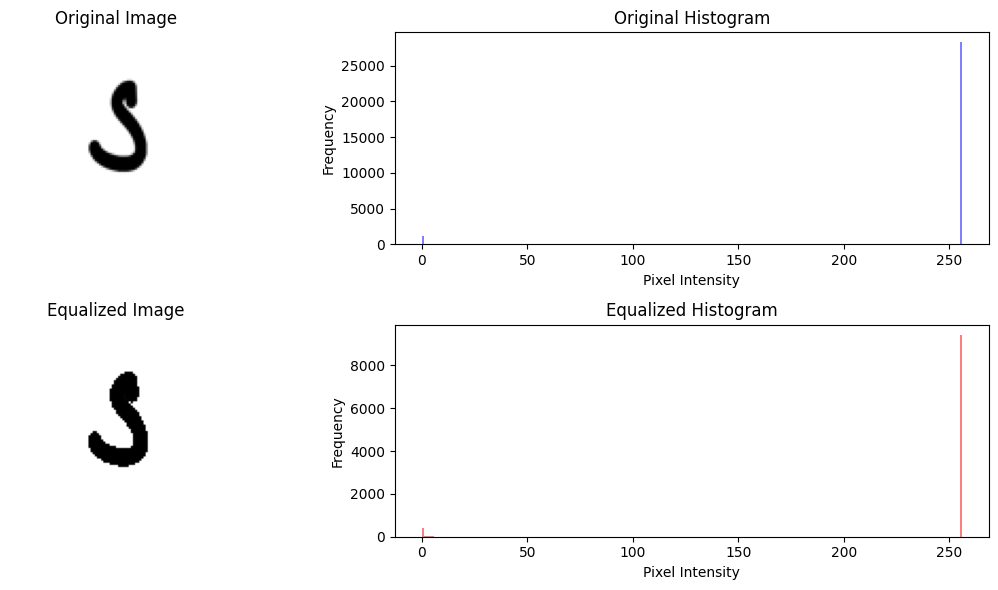

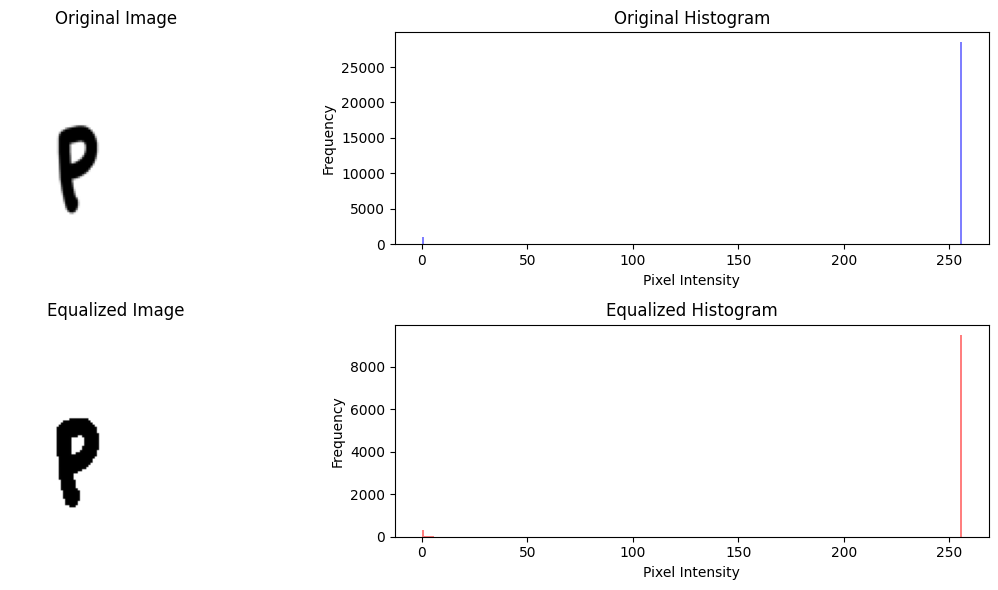

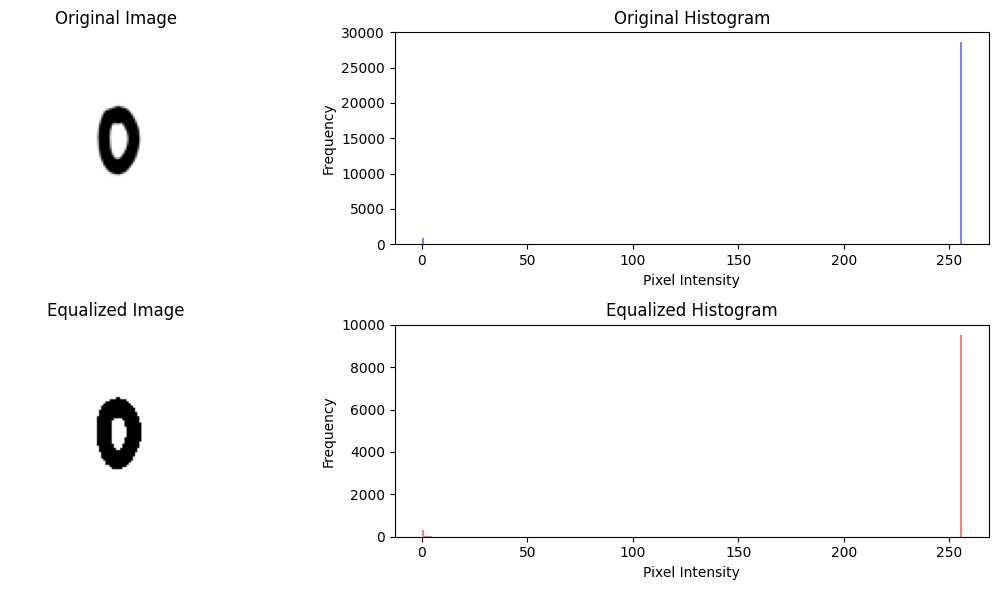

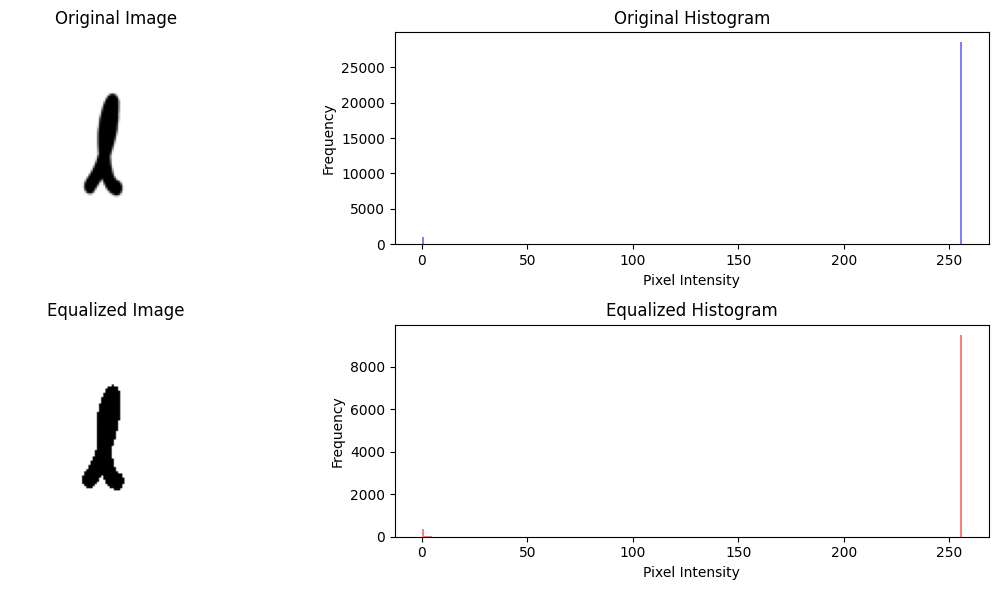

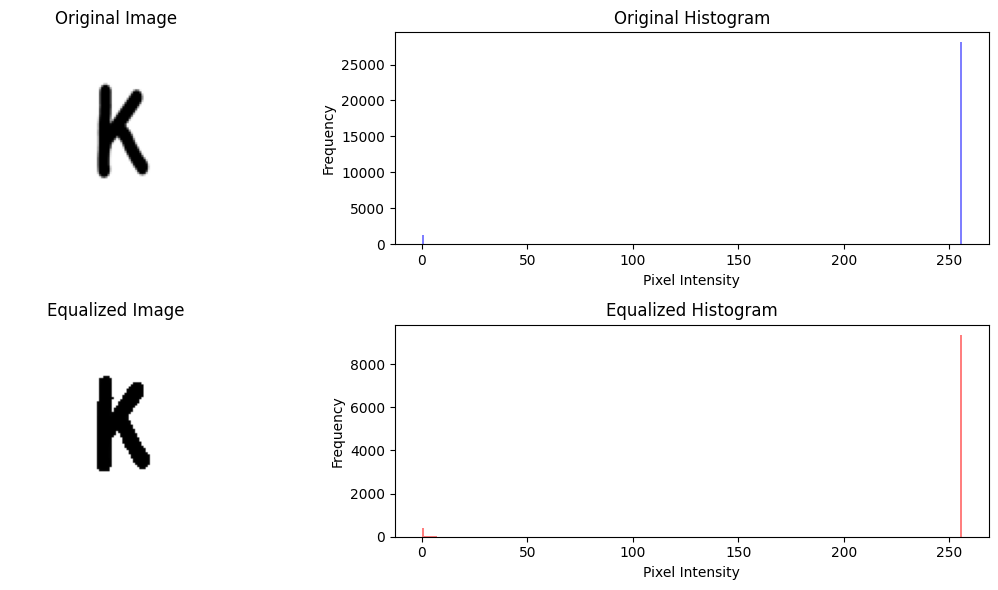

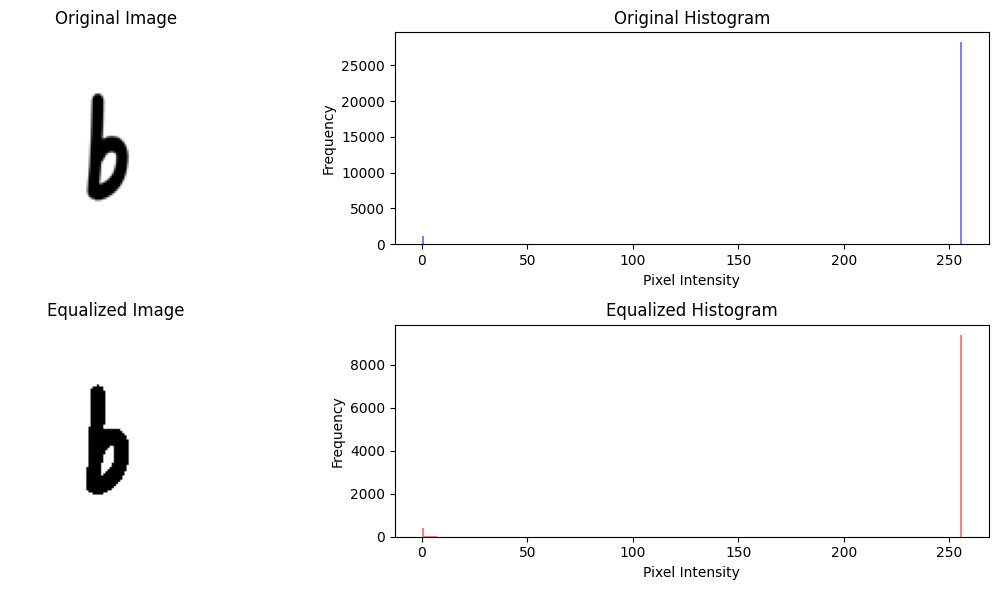

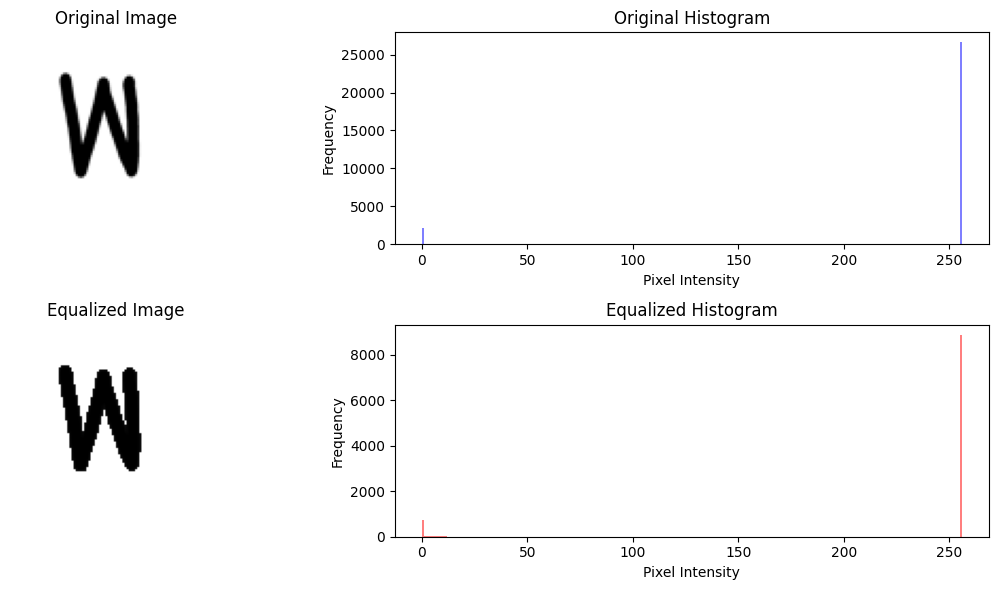

In [6]:
def histogram_equalization(img):
    if len(img.shape) == 3:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    else:
        gray = img
    equ = cv2.equalizeHist(gray)
    return equ


def plot_histograms(original_img, equalized_img):
    plt.figure(figsize=(12, 6))

    plt.subplot(2, 2, 1)
    plt.imshow(original_img, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(2, 2, 2)
    plt.hist(original_img.flatten(), bins=256, range=(0, 256), color='b', alpha=0.5)
    plt.title('Original Histogram')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')

    plt.subplot(2, 2, 3)
    plt.imshow(equalized_img, cmap='gray')
    plt.title('Equalized Image')
    plt.axis('off')

    plt.subplot(2, 2, 4)
    plt.hist(equalized_img.flatten(), bins=256, range=(0, 256), color='r', alpha=0.5)
    plt.title('Equalized Histogram')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

for i in range(min(10, len(x))):
    original_img = x[i]


    equalized_img = histogram_equalization(original_img)
    plot_histograms(original_img, equalized_img)


Loading the Label dataset

In [7]:
y=pd.read_csv("/home/mllab2/Desktop/ML/A3/english.csv")
len(y)

3410

Display the Label dataset

In [8]:
y

,image,label
0,Img/img001-001.png,0
1,Img/img001-002.png,0
2,Img/img001-003.png,0
3,Img/img001-004.png,0
4,Img/img001-005.png,0
...,...,...
3405,Img/img062-051.png,z
3406,Img/img062-052.png,z
3407,Img/img062-053.png,z
3408,Img/img062-054.png,z


Spliting The Traing and testing dataset

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

print("x_train Dataset shape:", x_train.shape)
print("y_train shape:", len(y_train))
print("x_test shape:", x_test.shape)
print("y_test shape:", len(y_test))

x_train Dataset shape: (2387, 100, 100, 3)
y_train shape: 2387
x_test shape: (1023, 100, 100, 3)
y_test shape: 1023


In [10]:
y_train_array = y_train.to_numpy()
y_test_array = y_test.to_numpy()

y_train_indices = np.argmax(y_train_array, axis=1)
y_test_indices = np.argmax(y_test_array, axis=1)

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train_indices)
y_test_encoded = label_encoder.transform(y_test_indices)

the neural network using keras

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(62, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=.01),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train_encoded, epochs=20, validation_data=(x_test, y_test_encoded))

Epoch 1/20
75/75 [==============================] - 85s 1s/step - loss: 6.5675 - accuracy: 0.5605 - val_loss: 0.7796 - val_accuracy: 0.5503
Epoch 2/20
75/75 [==============================] - 79s 1s/step - loss: 0.8159 - accuracy: 0.6234 - val_loss: 0.6377 - val_accuracy: 0.6696
Epoch 3/20
75/75 [==============================] - 79s 1s/step - loss: 0.7234 - accuracy: 0.6548 - val_loss: 0.6394 - val_accuracy: 0.6696
Epoch 4/20
75/75 [==============================] - 87s 1s/step - loss: 0.6925 - accuracy: 0.6590 - val_loss: 0.6432 - val_accuracy: 0.6696
Epoch 5/20
75/75 [==============================] - 86s 1s/step - loss: 0.6753 - accuracy: 0.6724 - val_loss: 0.6391 - val_accuracy: 0.6696
Epoch 6/20
75/75 [==============================] - 78s 1s/step - loss: 0.6565 - accuracy: 0.6900 - val_loss: 0.6447 - val_accuracy: 0.6696
Epoch 7/20
75/75 [==============================] - 76s 1s/step - loss: 0.6476 - accuracy: 0.6879 - val_loss: 0.6380 - val_accuracy: 0.6696
Epoch 8/20
75/75 [==

32/32 [==============================] - 9s 272ms/step - loss: 0.6610 - accuracy: 0.6706
testing Accuracy of Neural Network model using keras : 0.6705767512321472






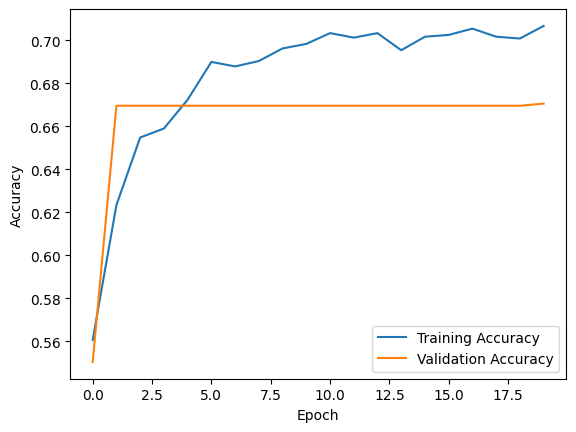

In [12]:
test_loss, test_accuracy = model.evaluate(x_test, y_test_encoded)
print(f"testing Accuracy of Neural Network model using keras : {test_accuracy}\n\n\n\n")

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

Neural network model Using Single Layer perceptron model

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x1, y, test_size=0.3, random_state=42)

y_train_array = y_train.to_numpy()
y_test_array = y_test.to_numpy()
y_train_indices = np.argmax(y_train_array, axis=1)
y_test_indices = np.argmax(y_test_array, axis=1)

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train_indices)
y_test_encoded = label_encoder.transform(y_test_indices)

In [14]:
perceptron_model = Perceptron(max_iter=20, eta0=0.01)

train_accuracies = []
val_accuracies = []

for epoch in range(20):
    perceptron_model.partial_fit(x_train, y_train_encoded, classes=np.unique(y_train_encoded))

    y_train_pred = perceptron_model.predict(x_train)

    train_accuracy = accuracy_score(y_train_encoded, y_train_pred)
    train_accuracies.append(train_accuracy)

    y_val_pred = perceptron_model.predict(x_test)

    val_accuracy = accuracy_score(y_test_encoded, y_val_pred)
    val_accuracies.append(val_accuracy)

    print(f"Epoch {epoch+1}/100 - Training Accuracy: {train_accuracy:.4f}, Validation Accuracy: {val_accuracy:.4f}")

y_test_pred = perceptron_model.predict(x_test)

Epoch 1/100 - Training Accuracy: 0.6891, Validation Accuracy: 0.6442
Epoch 2/100 - Training Accuracy: 0.6397, Validation Accuracy: 0.5797
Epoch 3/100 - Training Accuracy: 0.6804, Validation Accuracy: 0.6100
Epoch 4/100 - Training Accuracy: 0.7038, Validation Accuracy: 0.6696
Epoch 5/100 - Training Accuracy: 0.7009, Validation Accuracy: 0.6354
Epoch 6/100 - Training Accuracy: 0.7088, Validation Accuracy: 0.6579
Epoch 7/100 - Training Accuracy: 0.7126, Validation Accuracy: 0.6579
Epoch 8/100 - Training Accuracy: 0.6716, Validation Accuracy: 0.5709
Epoch 9/100 - Training Accuracy: 0.6393, Validation Accuracy: 0.5396
Epoch 10/100 - Training Accuracy: 0.5568, Validation Accuracy: 0.4604
Epoch 11/100 - Training Accuracy: 0.7038, Validation Accuracy: 0.6696
Epoch 12/100 - Training Accuracy: 0.7013, Validation Accuracy: 0.6168
Epoch 13/100 - Training Accuracy: 0.6963, Validation Accuracy: 0.6168
Epoch 14/100 - Training Accuracy: 0.6766, Validation Accuracy: 0.5670
Epoch 15/100 - Training Accur




Testing Accuracy fo Single Layer perceptron model : 0.6666666666666666





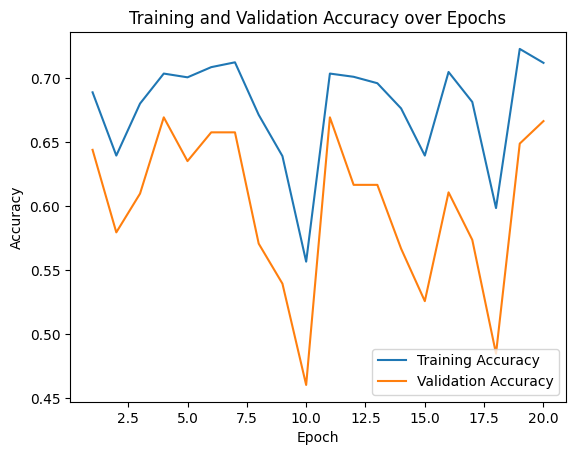

In [15]:
test_accuracy = accuracy_score(y_test_encoded, y_test_pred)

print(f"\n\n\nTesting Accuracy fo Single Layer perceptron model : {test_accuracy}\n\n\n")

plt.plot(range(1, 21), train_accuracies, label='Training Accuracy')
plt.plot(range(1, 21), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy over Epochs')
plt.show()

Neural network model Using multiple Layer perceptron model

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x2, y, test_size=0.3, random_state=42)

y_train_array = y_train.to_numpy()
y_test_array = y_test.to_numpy()
y_train_indices = np.argmax(y_train_array, axis=1)
y_test_indices = np.argmax(y_test_array, axis=1)

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train_indices)
y_test_encoded = label_encoder.transform(y_test_indices)

In [17]:
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=20, learning_rate_init=0.01)

train_accuracies = []
val_accuracies = []

for epoch in range(20):
    mlp_model.partial_fit(x_train, y_train_encoded, classes=np.unique(y_train_encoded))

    y_train_pred = mlp_model.predict(x_train)

    train_accuracy = accuracy_score(y_train_encoded, y_train_pred)
    train_accuracies.append(train_accuracy)

    y_val_pred = mlp_model.predict(x_test)

    val_accuracy = accuracy_score(y_test_encoded, y_val_pred)
    val_accuracies.append(val_accuracy)

    print(f"Epoch {epoch+1}/20 - Training Accuracy: {train_accuracy:.4f}, Validation Accuracy: {val_accuracy:.4f}")

y_test_pred = mlp_model.predict(x_test)

Epoch 1/20 - Training Accuracy: 0.2962, Validation Accuracy: 0.3304
Epoch 2/20 - Training Accuracy: 0.7038, Validation Accuracy: 0.6696
Epoch 3/20 - Training Accuracy: 0.7038, Validation Accuracy: 0.6696
Epoch 4/20 - Training Accuracy: 0.7038, Validation Accuracy: 0.6696
Epoch 5/20 - Training Accuracy: 0.7038, Validation Accuracy: 0.6696
Epoch 6/20 - Training Accuracy: 0.7038, Validation Accuracy: 0.6696
Epoch 7/20 - Training Accuracy: 0.7038, Validation Accuracy: 0.6696
Epoch 8/20 - Training Accuracy: 0.7038, Validation Accuracy: 0.6696
Epoch 9/20 - Training Accuracy: 0.7038, Validation Accuracy: 0.6696
Epoch 10/20 - Training Accuracy: 0.7038, Validation Accuracy: 0.6696
Epoch 11/20 - Training Accuracy: 0.7038, Validation Accuracy: 0.6696
Epoch 12/20 - Training Accuracy: 0.7038, Validation Accuracy: 0.6696
Epoch 13/20 - Training Accuracy: 0.7038, Validation Accuracy: 0.6696
Epoch 14/20 - Training Accuracy: 0.7038, Validation Accuracy: 0.6696
Epoch 15/20 - Training Accuracy: 0.7038, Va



Testing Accuracy fo Multiple Layer perceptron model : 0.6695992179863147




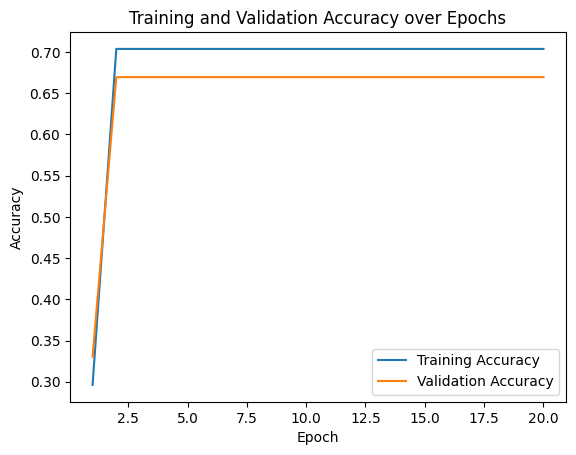

In [18]:
test_accuracy = accuracy_score(y_test_encoded, y_test_pred)

print(f"\n\nTesting Accuracy fo Multiple Layer perceptron model : {test_accuracy}\n\n")

plt.plot(range(1, 21), train_accuracies, label='Training Accuracy')
plt.plot(range(1, 21), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy over Epochs')
plt.show()